---

_You are currently using **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## SIADS 542: Supervised Learning, Week 1:  A simple classification task

### Import required modules and load data file

In [2]:
# Either of the following is no longer
# necessary for matplotlib in notebooks.
# The import statement has you covered!

# %matplotlib notebook
# %matplotlib inline

In [3]:
# Suppress all warnings only when absolutely necessary
# Warnings are in place for a reason!
import warnings

# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
np.set_printoptions(precision=3)

## Additional imports can be inlcuded here

In [6]:
fruits = pd.read_table("fruit_data_with_colors.txt")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [7]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

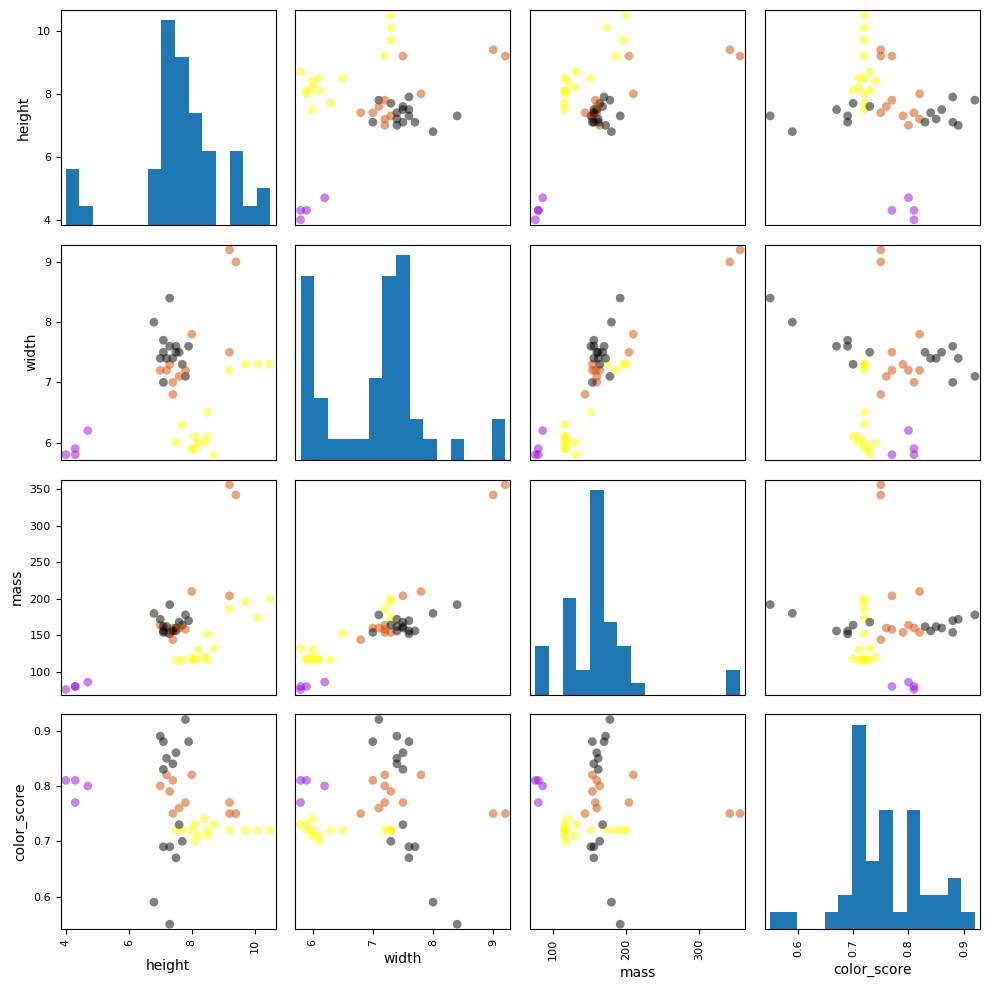

In [8]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[["height", "width", "mass", "color_score"]]
y = fruits["fruit_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap("gnuplot")
scatter = pd.plotting.scatter_matrix(
    X_train,
    c=y_train,
    marker="o",
    s=40,
    hist_kwds={"bins": 15},
    figsize=(10, 10),
    cmap=cmap,
)
plt.tight_layout()

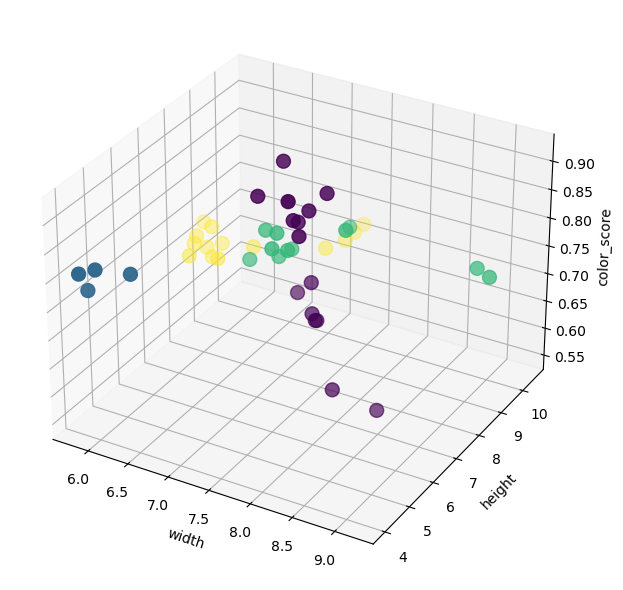

In [9]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("width")
ax.set_ylabel("height")
ax.set_zlabel("color_score")

ax.scatter(
    X_train["width"],
    X_train["height"],
    X_train["color_score"],
    c=y_train,
    marker="o",
    s=100,
)
plt.tight_layout()

### Create train-test split

In [10]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[["mass", "width", "height"]]
y = fruits["fruit_label"]

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# we choose k=5 nearest neighbors
k = 5

knn = KNeighborsClassifier(n_neighbors=k)

### Train the classifier (fit the estimator) using the training data

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
X_train

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0
49,132,5.8,8.7
29,160,7.0,7.4
37,154,7.3,7.3
56,116,5.9,8.1
18,162,7.5,7.1


### Estimate the accuracy of the classifier on future data, using the test data

In [15]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [16]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
# use a dataframe to avoid name warning

df_pred1 = pd.DataFrame(data={"mass": [20], "width": [4.3], "height": [5.5]})

fruit_prediction = knn.predict(df_pred1)
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [17]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
# use a dataframe to avoid name warning

df_pred2 = pd.DataFrame(data={"mass": [100], "width": [6.3], "height": [8.5]})

fruit_prediction = knn.predict(df_pred2)
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

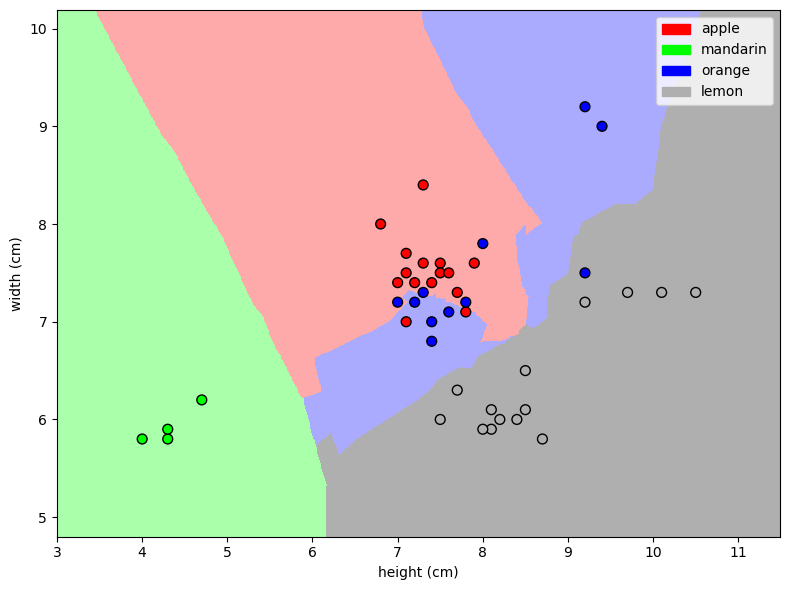

In [18]:
from adspy_shared_utilities import plot_fruit_knn

# we choose k=5 nearest neighbors
k = 5

plt.figure(figsize=(8, 6))
plot_fruit_knn(X_train, y_train, k, "uniform")
plt.tight_layout()

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

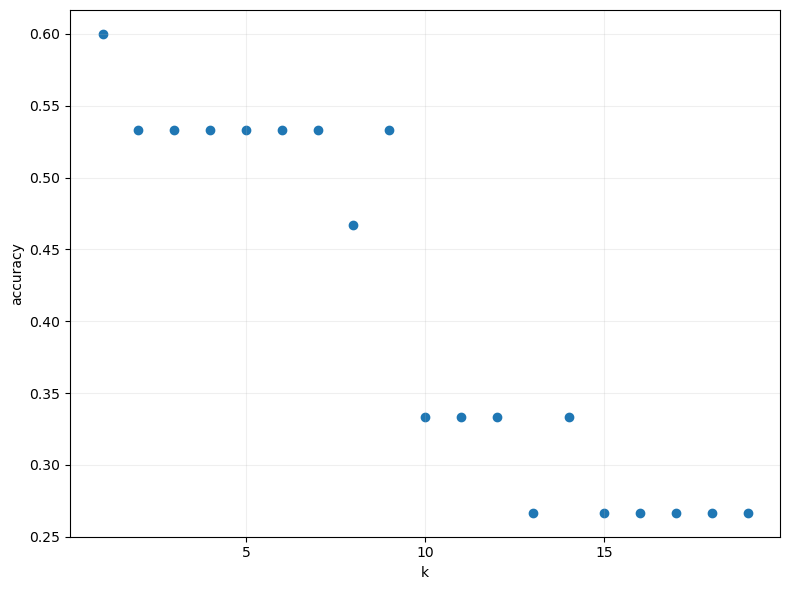

In [19]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.xticks([0, 5, 10, 15, 20])
plt.grid(alpha=0.2)

plt.scatter(k_range, scores)
plt.tight_layout()

### How sensitive is k-NN classification accuracy to the train/test split proportion?

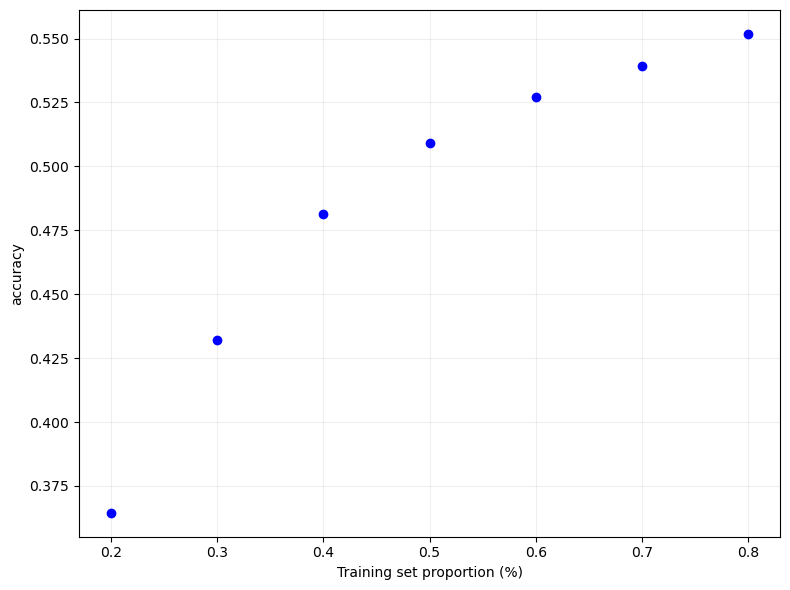

In [20]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

# we choose k=5 nearest neighbors
k = 5

knn = KNeighborsClassifier(n_neighbors=k)

plt.figure(figsize=(8, 6))
plt.xlabel("Training set proportion (%)")
plt.ylabel("accuracy")
plt.grid(alpha=0.2)

for s in t:

    scores = []
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), "bo")

plt.tight_layout()